# Нормалізація та стандартизація ознак

Здебільшого ми стикаємося з різними типами змінних з різними діапазонами, які можуть суттєво відрізнятися в одному і тому ж наборі даних. Якщо ми використовуємо дані з оригінальним масштабом, ми, безумовно, надамо більшої ваги змінним з великим діапазоном. 

Тому нам потрібно застосувати те, що називається перемасштабуванням ознак, щоб переконатися, що змінні мають майже однаковий масштаб, що дозволяє розглядати ознаки як однаково важливі. Часто ми звертаємося до понять стандартизації або нормалізації ознак.

**Нормалізація** означає, що ми змінюємо діапазон значень без зміни форми розподілу. Діапазон часто встановлюється в межах від `0` до `1` або від `-1` до `1`.

**Стандартизація** означає перетворення розподілу даних у нормальну форму і перетворення середнього значення даних на `0`, а його дисперсії - на `1`.

Багато алгоритмів машинного навчання працюють краще або сходяться швидше, коли ознаки близькі до нормально розподілених і мають відносно схожий масштаб. Важливо трансформувати дані для кожної ознаки, щоб дисперсія кожної ознаки була еквівалентною іншим за порядком величини, щоб уникнути домінування цільової функції (наприклад, ядра радіальної базисної функції машин з опорними векторами), яка може зробити оцінювач нездатним правильно навчатися.

Масштабування даних необхідне в алгоритмах, що базуються на градієнтному спуску (лінійна регресія, нейронні мережі) та алгоритмах, що базуються на відстані (k-найближчих сусідів, k-середніх, SVM). Наприклад, немає сенсу стандартизувати дані перед вимірюванням важливості змінних у регресійних моделях або перед використанням регресій ласо та хребтових регресій.

Причина стандартизації даних не однакова для всіх алгоритмів машинного навчання. Наприклад, у моделях на основі відстаней ми виконуємо стандартизацію, щоб запобігти домінуванню ознак з більш широкими діапазонами в метриці відстані. Деякі алгоритми, зокрема деревоподібні, такі як дерево рішень, випадковий ліс і градієнтний бустінг, не чутливі до величини змінних.

Розглянемо приклад нормалізації та стандартизації за допомогою набору даних, який містить дані об'єму сірої речовини у мозку різних пацієнтів. Спочатку імпортуємо необхідні бібліотеки:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
from scipy.stats import skew
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn import preprocessing
import os

Далі завантажуємо набір даних та витягуємо ознаку `TotalGrayVol` з набору даних

In [11]:
csv_data = 'assets/brain_train.csv'
data = pd.read_csv(csv_data, delimiter=';')
df = data[["Target","TotalGrayVol"]]
y = df.loc[:, df.columns == 'Target'].values.ravel()
X = df.loc[:, df.columns != 'Target']

print(X[:10])

    TotalGrayVol
0  684516.128934
1  615126.611828
2  678687.178551
3  638615.189584
4  627356.125850
5  656448.761124
6  622381.177366
7  648421.325320
8  659255.291116
9  618551.688986


## Стандартизація даних

Спочатку розглянемо процес стандартизації даних. Результатом стандартизації набору даних (або нормалізації Z-рахунку) є те, що ознаки перемасштабуються так, щоб середнє значення та стандартне відхилення дорівнювали `0` та `1` відповідно. Цей процес необхідний, коли безперервні незалежні змінні були виміряні в різних масштабах, наприклад, в різних одиницях виміру.

`StandardScaler` видаляє середнє значення і масштабує до одиничної дисперсії:

$z=\frac{x-mean(x)}{stdev(x)}$

Багато оцінок машинного навчання поводитимуться погано, якщо окремі ознаки не є стандартними, нормально розподіленими даними (гаусіана з нульовим середнім та одиничною дисперсією).

Здебільшого аналітики даних не звертають уваги на форму розподілу. Вони просто центрують дані, видаляючи середнє значення кожної ознаки, і масштабують їх, ділячи непостійні значення на їхнє стандартне відхилення. Техніка `StandardScaler` передбачає, що дані розподілені нормально. По суті, ідея стандартизації набору даних полягає в тому, щоб мати рівний діапазон і дисперсію від перемасштабованої вихідної змінної.

<div style="text-align: center;">
    <img src="assets/image_0003.png" style="max-width:800px;width:100%">
</div>

Під час стандартизації ознаки масштабуються так, щоб середнє значення та стандартне відхилення дорівнювали `0` та `1` відповідно.

<div style="text-align: center;">
    <img src="assets/image_0004.png" style="max-width:800px;width:100%">
</div>

Результатом цього перетворення є те, що ми змістили середнє значення до 0; таким чином, більшість даних (`68%`) будуть знаходитися між `-1` та `1`.

Уявімо, що дані не є нормально розподіленими і що `50%` точок даних мають значення `0`, а решта `50%` мають значення `1`. Гаусове масштабування віднесе половину даних до `-1`, а іншу половину до `+1`; дані будуть віддалені від `0`. Залежно від форми наших даних, ми повинні розглянути інші види масштабування, які дадуть кращі результати.

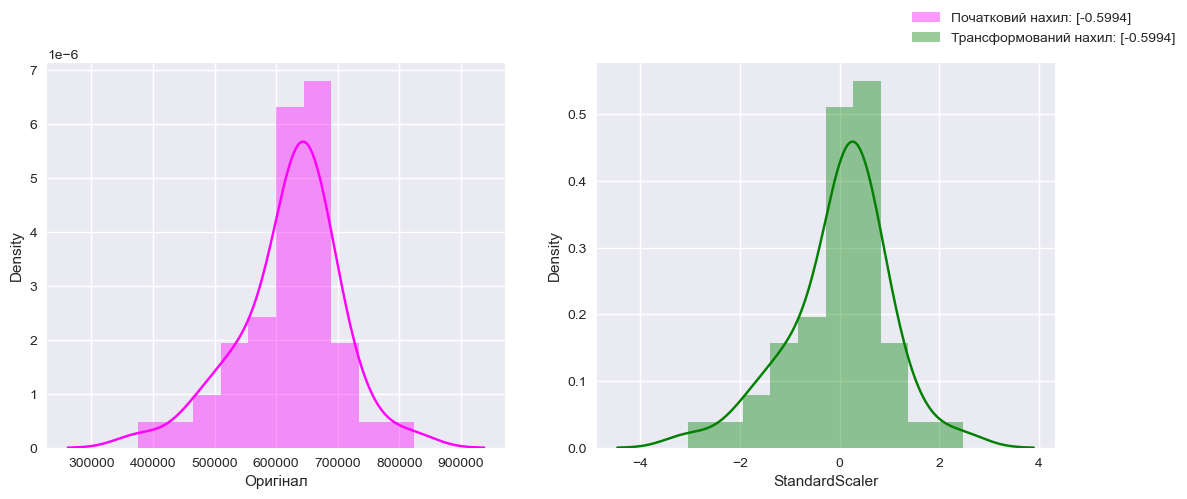

In [12]:
StandardScaler = preprocessing.StandardScaler()
stdscaler_transformed = StandardScaler.fit_transform(X)

plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Початковий нахил: {0}".format(np.round(skew(X),4)),
color="magenta", ax=ax[0], axlabel="Оригінал")
sns.distplot(stdscaler_transformed, label= "Трансформований нахил: {0}".format(np.round(skew(stdscaler_transformed),4)), color="g", ax=ax[1], axlabel="StandardScaler")
fig.legend()
plt.show()

Ми бачимо, що форма розподілу не змінилася. Вершина кривої, як і очікувалося, зосереджена в точці '0'.

## Нормалізація даних Min-Max

Нормалізація даних Min-max (`MinMaxScaler`) може бути дуже корисна для деяких моделей машинного навчання. `MinMaxScaler` має деякі переваги над `StandardScaler`, коли розподіл даних не є гауссовим і ознака потрапляє в обмежений інтервал, що зазвичай трапляється з інтенсивністю пікселів, які знаходяться в діапазоні `0-255`. Нормалізація даних Min-max обчислюється наступним чином:

$z=\frac{x_i-min(x)}{max(x)-min(x)}$

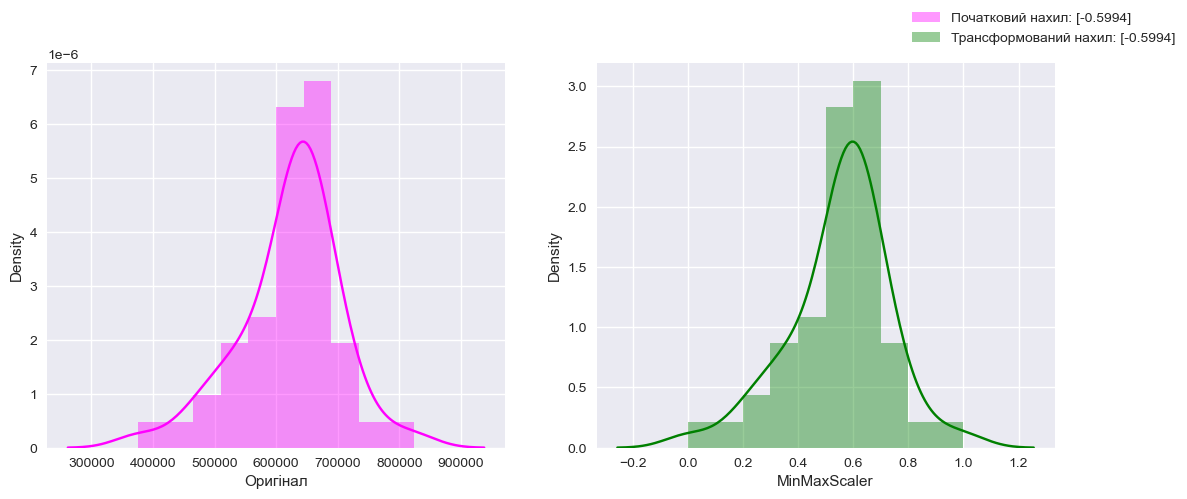

In [13]:
# Визначити MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# Трансформувати дані
minmax_transformed = min_max_scaler.fit_transform(X)

# Побудувати графік результату
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Початковий нахил: {0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="Оригінал")
sns.distplot(minmax_transformed, label= "Трансформований нахил: {0}".format(np.round(skew(minmax_transformed),4)), color="g", ax=ax[1], axlabel="MinMaxScaler")
fig.legend()
plt.show()

За замовчуванням, діапазон ознаки знаходиться між `0` і `1`. Ми можемо змінити цей діапазон, додавши опцію `feature_range`:

`preprocessing.MinMaxScaler(feature_range=(0, 1))`

## Нормалізація даних MaxAbs

Нормалізація MaxAbs схожа на MinMax з тією різницею, що вона автоматично масштабує дані між `0` і `1` на основі абсолютного максимуму. Цей масштабувальник особливо підходить для даних, які вже відцентровані на нулі або розріджених даних, і не центрує їх, зберігаючи розрідженість. Нормалізація даних MaxAbs обчислюється наступним чином:

$z=\frac{x_i}{max(abs(x))}$

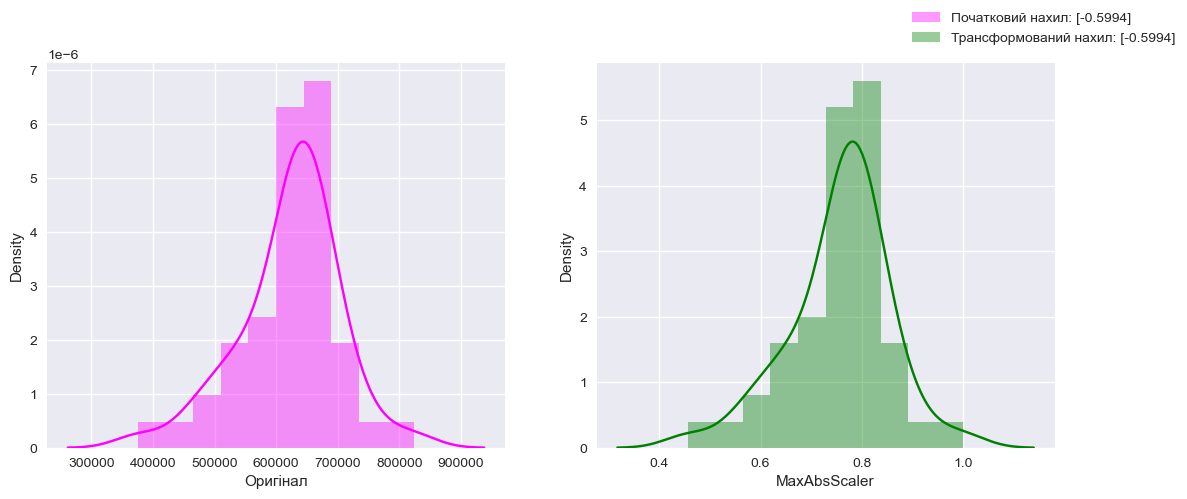

In [14]:
# Визначити MaxAbsScaler
max_abs_scaler = preprocessing.MaxAbsScaler()

# Трансформувати дані
maxabs_transformed = max_abs_scaler.fit_transform(X)

# Побудувати графік результату
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Початковий нахил: {0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="Оригінал")
sns.distplot(maxabs_transformed, label= "Трансформований нахил: {0}".format(np.round(skew(maxabs_transformed),4)), color="g", ax=ax[1], axlabel="MaxAbsScaler")
fig.legend()
plt.show()

## Нормалізація даних RobustScaler

Якщо дані містять значну кількість викидів, використання середнього значення та дисперсії для масштабування даних, ймовірно, не буде працюватиме коректно. У цьому випадку можна використовувати `RobustScaler`, який видаляє медіану і масштабує дані відповідно до квантильних діапазонів:

$z=\frac{x_i-Q_1(x)}{Q_3(x)-Q_1(x)}$

На рисунку нижче можна побачити, що масштабувальник використовує міжквартильний діапазон (IQR), тобто діапазон між першим квартилем `Q1(x)` і третім квартилем `Q3(x)`.

<div style="text-align: center;">
    <img src="assets/image_0005.png" style="max-width:800px;width:100%">
</div>


Квартилі - це значення, які розділяють впорядкований набір даних на чотири рівних частини. Перший квартиль (Q1) є значенням, нижче якого знаходиться 25% даних, другий квартиль (Q2) - медіана, яка розділяє дані навпіл, третій квартиль (Q3) - значення, нижче якого знаходиться 75% даних, а четвертий квартиль (Q4) - значення, нижче якого знаходиться 100% даних.

Для обчислення квартилів:

1. спочатку впорядкуйте дані за зростанням;
2. знайдіть медіану даних, це буде другий квартиль Q2;
3. для знаходження першого квартилю Q1 візьміть медіану даних, які знаходяться ліворуч від Q2;
4. для знаходження третього квартилю Q3 візьміть медіану даних, які знаходяться праворуч від Q2.

Якщо кількість даних непарна, медіана буде точним значенням. Якщо ж кількість даних парна, медіана обчислюється як середнє арифметичне двох середніх значень.

Наприклад, якщо у вас є набір даних: `3, 7, 1, 8, 5, 10, 2, 4, 6, 9`.

1. впорядкуйте дані: `1, 2, 3, 4, 5, 6, 7, 8, 9, 10`;
2. знайдіть медіану (Q2), яка дорівнює `5`;
3. для знаходження Q1 візьміть медіану даних ліворуч від `5`: `1, 2, 3, 4`, що дорівнює `2.5` (середнє між `2` і `3`);
4. для знаходження Q3 візьміть медіану даних праворуч від `5`: `6, 7, 8, 9`, що дорівнює `7.5` (середнє між `7` і `8`).

Отже, перший квартиль (Q1) дорівнює `2.5`, другий квартиль (Q2 або медіана) дорівнює `5`, а третій квартиль (Q3) дорівнює `7.5`.

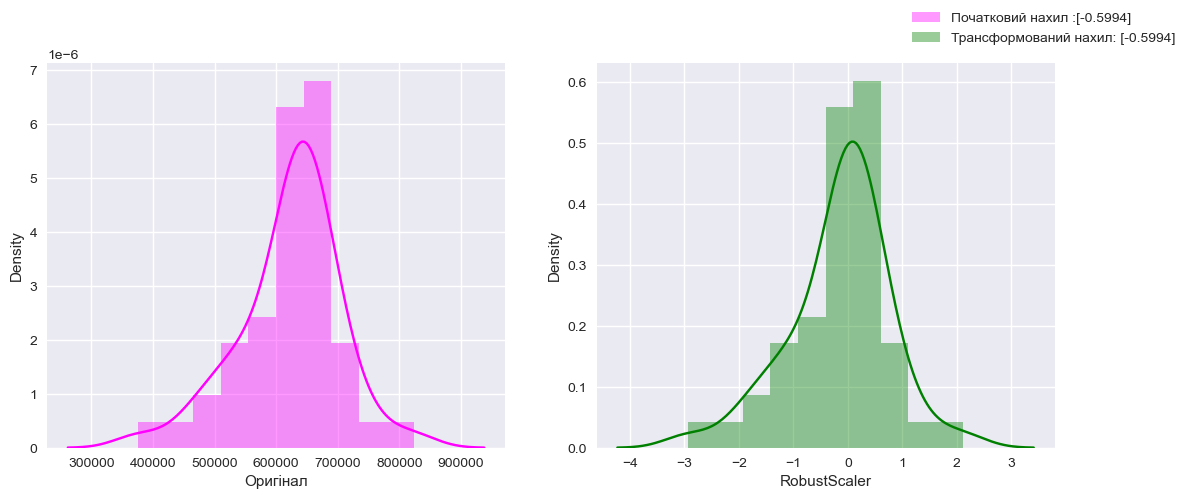

In [16]:
# Визначити RobustScaler
RobustScaler = preprocessing.RobustScaler()

# Трансформувати дані
robust_transformed = RobustScaler.fit_transform(X)

# Побудувати графік результату
plt.rcParams["figure.figsize"] = 13,5
fig,ax = plt.subplots(1,2)
sns.distplot(X, label= "Початковий нахил :{0}".format(np.round(skew(X),4)), color="magenta", ax=ax[0], axlabel="Оригінал")
sns.distplot(robust_transformed, label= "Трансформований нахил: {0}".format(np.round(skew(robust_transformed),4)), color="g", ax=ax[1], axlabel="RobustScaler")
fig.legend()
plt.show()

## Коли використовувати стандартизацію, а коли нормалізацію?

Перш за все, треба визначити відмінності однієї процедури від іншої.

**Нормалізація:**

- масштабує значення в діапазоні від `0` до `1`;
- корисно, коли розподіл даних невідомий або не є гауссовим;
- чутлива до викидів;
- зберігає форму початкового розподілу;
- може не зберігати взаємозв'язки між точками даних.

**Стандартизація:**

- центрує дані навколо середнього значення і масштабує до стандартного відхилення `1`;
- корисно, коли розподіл даних є гауссовим або невідомим;
- менш чутлива до викидів;
- змінює форму вихідного розподілу;
- зберігає зв'язки між точками даних.

Вибір між стандартизацією та нормалізацією для передобробки даних залежить від контексту задачі, особливостей даних та вимог до алгоритмів машинного навчання, які будуть використовуватися. Ось декілька ключових аспектів для визначення, коли краще використовувати стандартизацію, а коли нормалізацію.

**Коли використовувати стандартизацію:**

- алгоритми, засновані на відстані: стандартизація особливо корисна для алгоритмів, які враховують відстані між точками, таких як K-найближчих сусідів (KNN) і метод опорних векторів (SVM). Вона допомагає забезпечити, що кожна ознака вносить однаковий вклад в відстань незалежно від масштабу оригінальних даних;
- алгоритми, що використовують градієнтний спуск: методи, як лінійна регресія і нейронні мережі, часто виграють від стандартизації, оскільки вона сприяє швидшій збіжності під час навчання через градієнтний спуск;
- дані з великою різницею в дисперсіях: стандартизація ефективно зменшує вплив ознак з великою дисперсією, що може домінувати над іншими ознаками при моделюванні.

**Коли використовувати нормалізацію:**

- дані з визначеними межами: коли дані мають чіткі межі, які важливі для задачі (наприклад, пікселі зображення, які можуть варіюватися від 0 до 255), нормалізація до діапазону [0, 1] може бути дуже ефективною;
- алгоритми, чутливі до масштабу ознак: нейронні мережі часто виграють від нормалізації, оскільки вона допомагає уникнути проблем з числовою стабільністю та дозволяє моделі швидше збігатися;
- уніфікація масштабів: нормалізація може бути корисною для уніфікації масштабу ознак при обробці даних з різних джерел, щоб усі ознаки мали однаковий ваговий вплив на модель.

**Різуміння вибору:**

- стандартизація є більш загальною та часто використовується у широкому спектрі моделей машинного навчання, особливо коли дані не обмежені визначеними межами;
- нормалізація може бути кращим вибором у ситуаціях, де дані вже обмежені або коли модель має особливі вимоги до масштабу вхідних даних;

Обидва методи важливі залежно від контексту і часто використовуються разом з іншими методами передобробки для досягнення оптимальної ефективності моделі. Важливо провести дослідження та експерименти з даними, щоб визначити, який метод найкраще підходить для конкретної задачі.




